In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import cufflinks as cf
import plotly.express as px

# Library for feature Scaling
from sklearn.preprocessing import RobustScaler

In [2]:
df_test=pd.read_csv("Titanic_test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df_train = pd.read_csv("Titanic_train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Examine the features, their types, and summary statistics

In [4]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
df_train.describe() # checking mean and std

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

Heat Map To check correlation between numerical features

In [9]:
train_data_num_col = df_train.select_dtypes(exclude=['object']).columns
train_data_num = df_train[train_data_num_col]

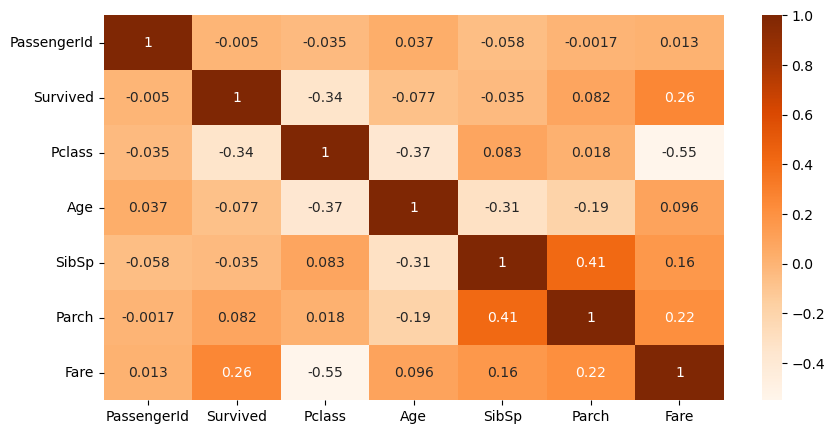

In [10]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_data_num.corr(), annot=True, cmap='Oranges');

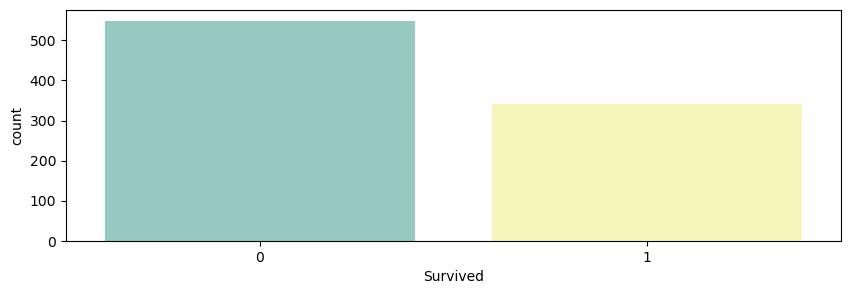

In [11]:
plt.figure(figsize=(10, 3))
sns.countplot(x = "Survived",data=df_train, palette="Set3")
plt.show()

# the no. of person survived are less as compared to people which didnt survive

the no. of person survived are less as compared to people which didnt survive

Survival based on sex

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

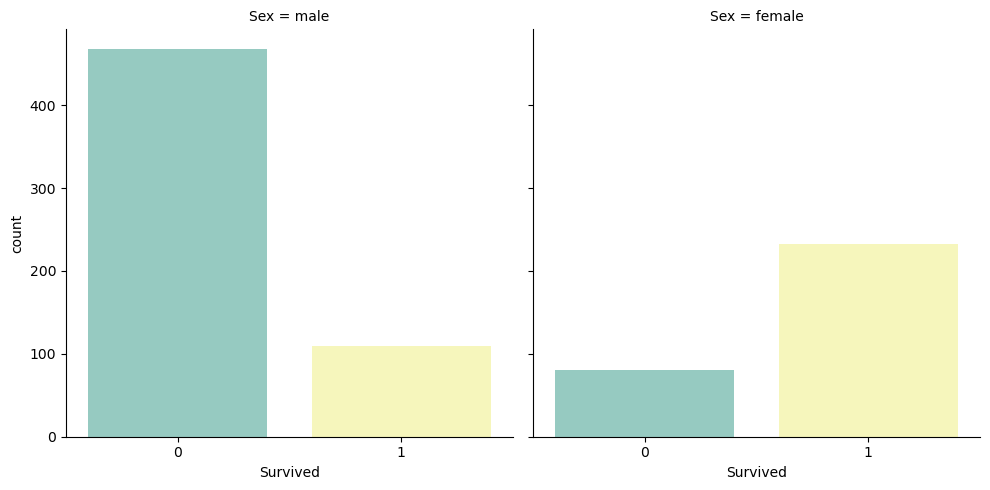

In [12]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Sex', kind='count', data=df_train,palette="Set3");
plt.show()

Survival based on Pclass - Passenger Class

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

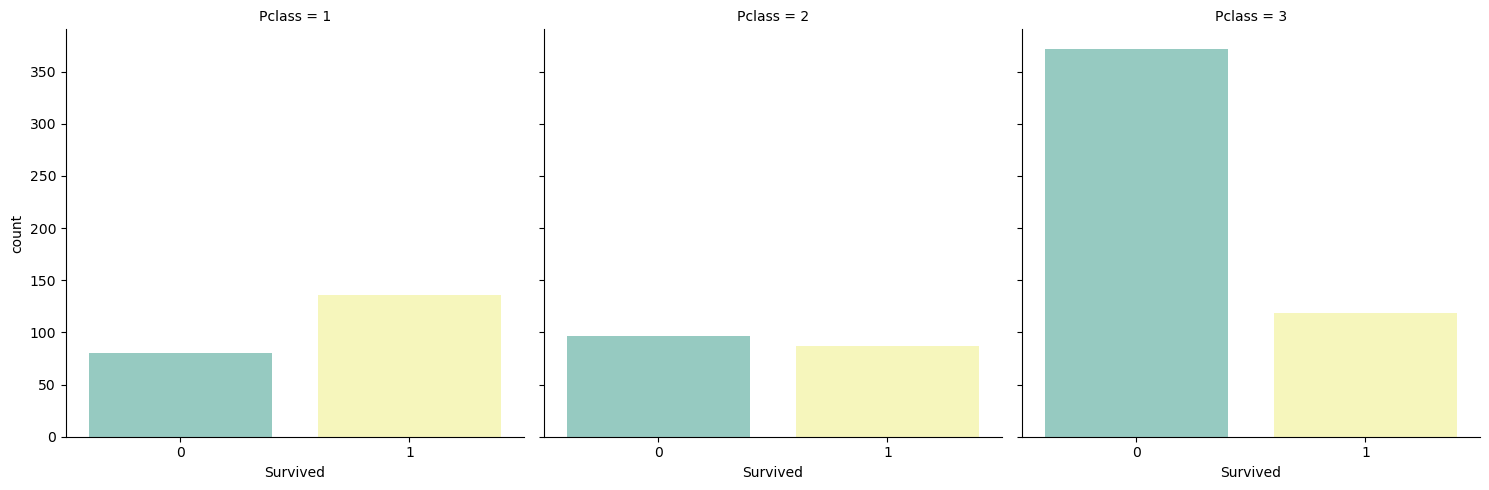

In [13]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Pclass', kind='count', data=df_train,palette="Set3");
plt.show()



 people which belonged to passenger class- 3 didnt survived

Survival based on Pclass and Sex

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

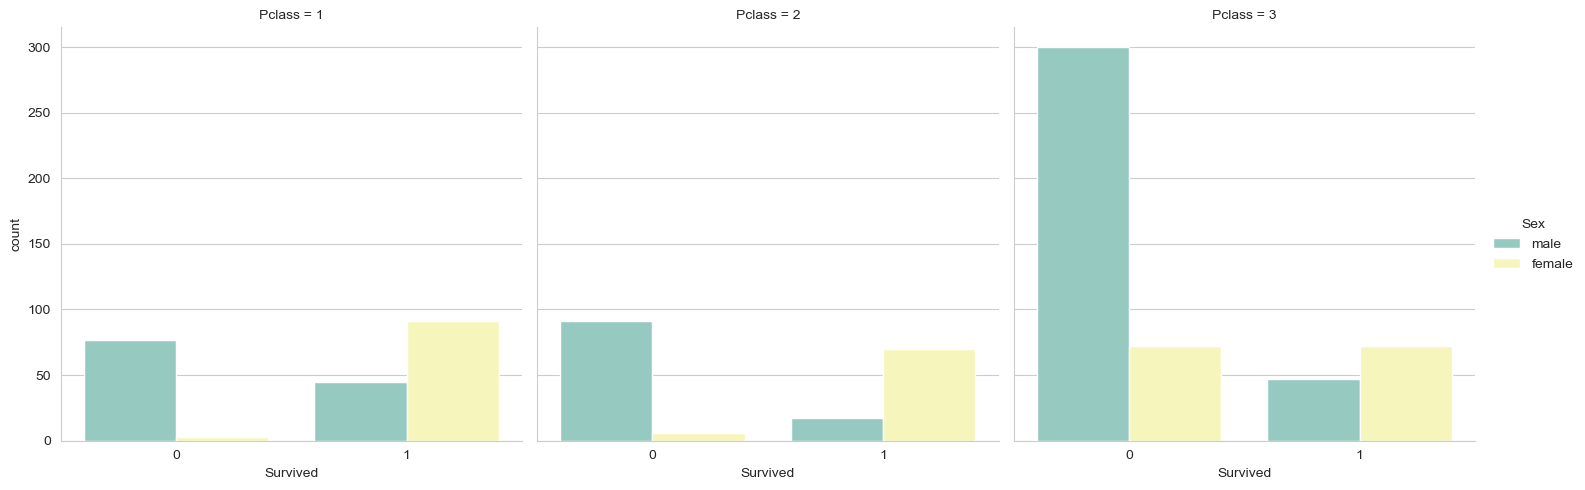

In [14]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Pclass', hue = 'Sex', kind='count', data=df_train,palette="Set3");
plt.show()

above plot states that Pclass- 3 The majority of male and half of female did not survive
PClass 2 & 1 Almost all who didnt survive are male

Survival based on Embarked

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

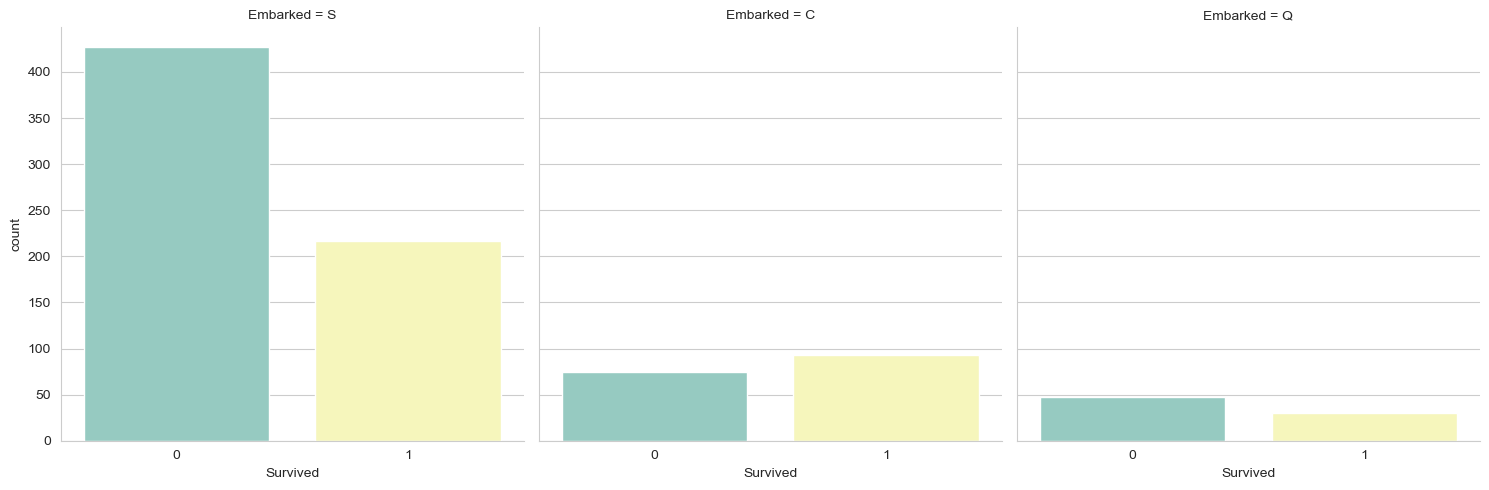

In [15]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', kind='count', data=df_train,palette="Set3");
plt.show()

Majority of people boarded from Southampton port could not survive. Already we have seen people in 3rd Class could not survive. So we have check relation between Pclass and Embarked

Survival based on Embarked and Pclass

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x300 with 0 Axes>

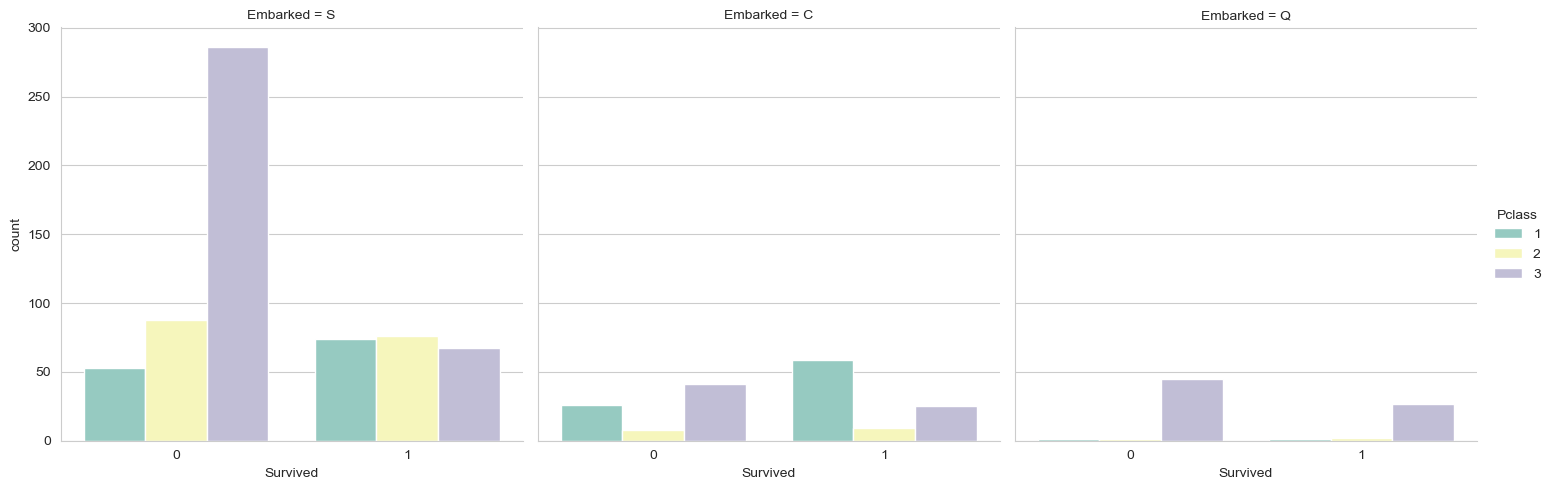

In [16]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', hue = 'Pclass', kind='count', data=df_train,palette="Set3");
plt.show()

Embarked S - Majority of people died belong to PClass 3. Embarked C - Here Pclass 2 has less death compared to other 2 class, still Pclass 3 has majority of death. But when compared to Embarked C infact it is much much less.
Embarked Q - Here Pclass 3 only have death rate.

Survival based on Fare

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



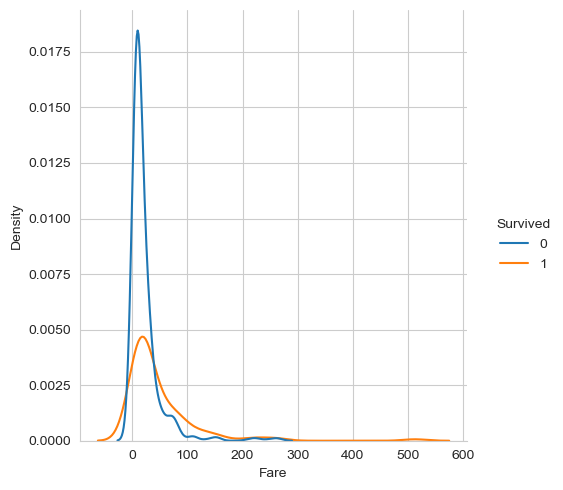

In [17]:
sns.displot(data=df_train, x="Fare",hue='Survived',kind ='kde')

The Maximum of people who could not survive were those who bought the ticket with low fare.

Survival based on Sex

In [18]:
pd.crosstab(df_train.Sex,df_train.Survived,normalize = "index" ).style.background_gradient(cmap='crest')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


Out of total females traveled 74.2% of them could survive but only 18.9% of total male traveled could survive

Survival based on Pclass

In [19]:
pd.crosstab(df_train.Pclass,df_train.Survived,normalize = "index" ).style.background_gradient(cmap='Spectral_r')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


Statistical analysis of survival based on Pclass shows, 62.96% of PClass 1 could survive, and 47.28% of Pclass2 could survive and 24.24% of PClass3 could survive

Survival based on Embarked

In [20]:
pd.crosstab(df_train.Embarked,df_train.Survived,normalize = "index" ).style.background_gradient(cmap='Pastel1')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


Statistical analysis of survival based on Embarked shows, 55.36% of Embarked C could survive, and 38.96% of Embarked Q could survive and 33.7% of Embarked s could survive.

Visual Representation of feature

Visual representation of age

<Axes: xlabel='Age', ylabel='Count'>

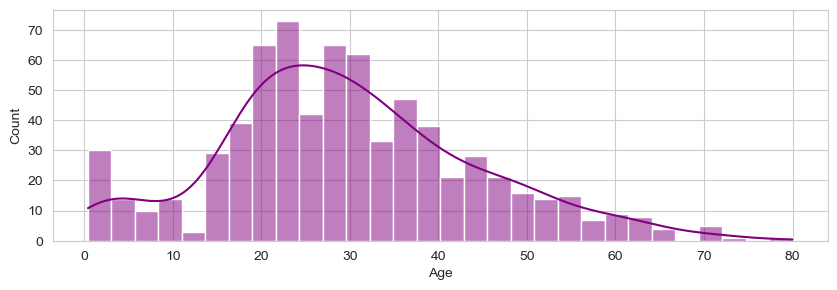

In [21]:
plt.figure(figsize=(10, 3))
sns.histplot(df_train['Age'].dropna(),kde=True,color='purple',bins=30)

Age distribution visualisation, clearly shows skew towards younger passengers.

If more details of age group is to be seen, we can use cufflinks.

In [22]:
cf.go_offline()
df_train['Age'].iplot(kind='hist',bins=35)

From cufflinks visualisation, it is much more clear about passenger age distribution. The passgeners are more likely to belong to age group grom 18-33 and there are quite few infant passengers from 0-2. cufflinks visualisation allows to create an interactive plot, like can magnify, zoom in zoom out and much more options.

Visualisation of SibSp (Siblings/Spouses )

<Axes: xlabel='SibSp', ylabel='count'>

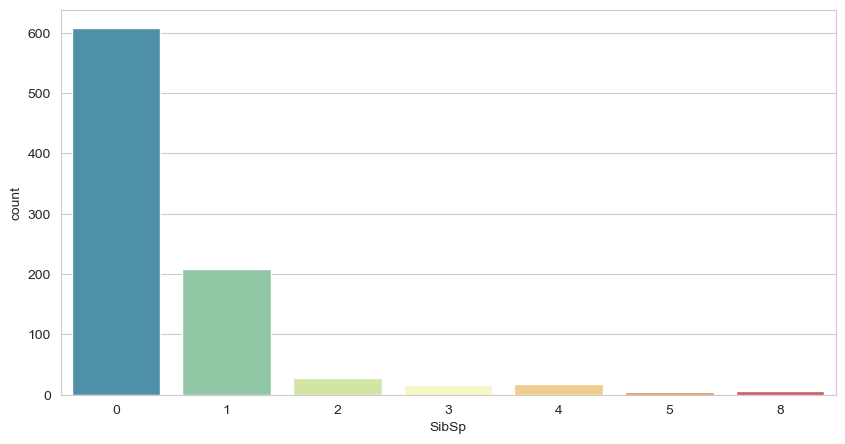

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(x='SibSp',data=df_train, palette='Spectral_r')

The above visualisation clearly states most of the people travelled didnot have sibling or spouse

Visualisation of Parch feature

<Axes: xlabel='Parch', ylabel='count'>

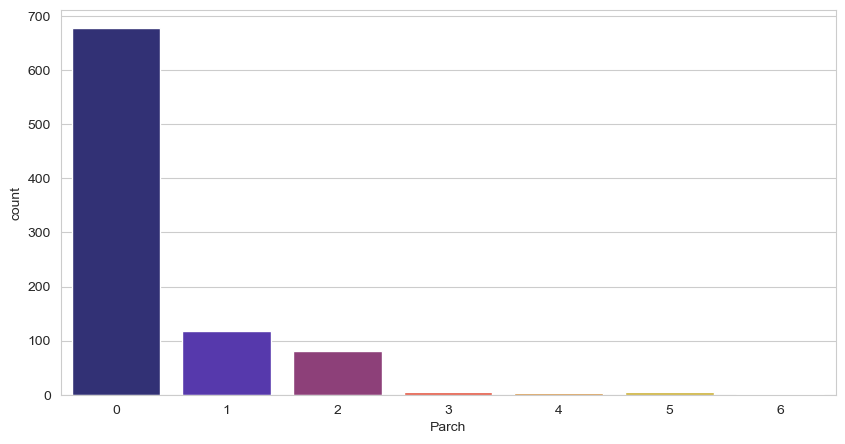

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Parch',data=df_train,palette='CMRmap')

The above visualisation clearly states most of the people travelled didnot have children accompanying them

Joint plot of SibSp and Parch
As Visual representation of SibSp and Parch shows there majority where single passengers, so we can use a joint map to check the distribution.

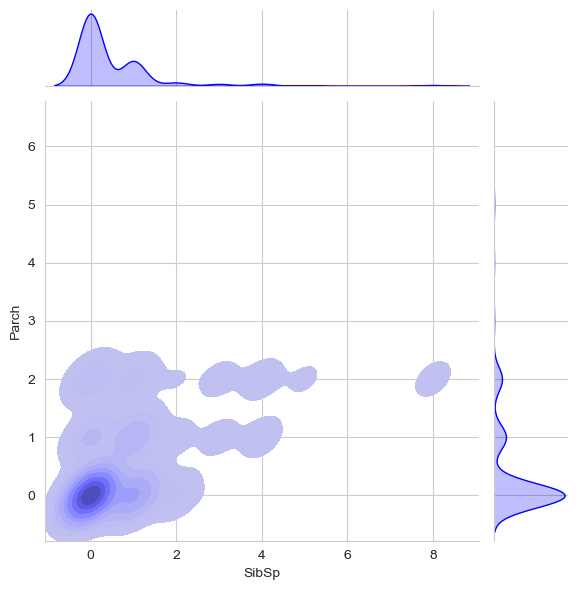

In [25]:
sns.jointplot(x='SibSp',y='Parch',data=df_train,color='blue',kind='kde', fill =True);

3D Visualisation of a person with features Name,Sex and Age

In [26]:
plt.figure(figsize=(10, 3))
fig = px.scatter_3d(df_train, x='Name', y='Sex', z='Age', color='Age')
fig.show()

<Figure size 1000x300 with 0 Axes>

Each point, represents a person and it shows name, sex and age. Color indicator is Age.

2. Data Preprocessing:

a. Handle missing values (e.g., imputation).
b. Encode categorical variables.
c. check duplicates

In [27]:
df_train.duplicated().any()

False

In [28]:
df_train.isnull().sum()


# AGe , Cabin, Embarked have missing values       

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
# mean encoding for age column because the distribution is normal and it has no outliers

mean_age = df_train['Age'].mean()


In [30]:
#  Fill missing values in the Age column with the mean age
df_train['Age'].fillna(mean_age, inplace=True)

In [31]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
# mode imputation for embarked column
#'C' for Cherbourg, 'Q' for Queenstown, and 'S' for Southampton

mode_embarked = df_train['Embarked'].mode()[0]

In [33]:
df_train['Embarked'].fillna(mode_embarked, inplace=True)

In [34]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

lets do same for test data

In [35]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [36]:
#mean imputation for Age column

mean_age_test = df_test['Age'].mean()

In [37]:
df_test['Age'].fillna(mean_age_test, inplace=True)

In [38]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [39]:
# mean imputation for Fare column
mean_fare_test = df_test['Fare'].mean()
df_test['Fare'].fillna(mean_fare_test, inplace=True)

In [40]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [41]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [42]:
#Saving PassengerID for submission
#test_pass = df_test['PassengerId']
#test_pass

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

Dropping Cabin and PassengerId column from train and test data because it is useless and cabins are represented as C85, C123 etc

In [43]:
df_train.drop(columns=['Cabin', 'PassengerId'], inplace=True)

In [44]:
df_test.drop(columns=['Cabin', 'PassengerId'], inplace=True)

Ecoding Categorical Features

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


From train_data.info(), it is clear that we have 4 categorical variables in our dataset. They are Name, Sex, Ticket and Embarked.

Features Name and Ticket will have no significant meaning for determining target, so we can drop those two from train and test data. Where as Sex and Embarked feautres will have to be encoded before builiding model.

In [46]:
df_train.drop(['Name','Ticket'],axis=1,inplace=True)

dropping Name and Ticket from Test data

In [47]:
df_test.drop(['Name','Ticket'],axis=1,inplace=True)

In [48]:
df_train.head()

# df_train['Embarked'].unique()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Encoding categorical features like AGE and Embarked

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform = 'pandas')

In [51]:
ohetransform = ohe.fit_transform(df_train[['Sex']])
ohetransform


df_train= pd.concat([df_train, ohetransform], axis=1).drop(columns = ['Sex'])
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.000000,1,0,7.2500,S,0.0,1.0
1,1,1,38.000000,1,0,71.2833,C,1.0,0.0
2,1,3,26.000000,0,0,7.9250,S,1.0,0.0
3,1,1,35.000000,1,0,53.1000,S,1.0,0.0
4,0,3,35.000000,0,0,8.0500,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,S,0.0,1.0
887,1,1,19.000000,0,0,30.0000,S,1.0,0.0
888,0,3,29.699118,1,2,23.4500,S,1.0,0.0
889,1,1,26.000000,0,0,30.0000,C,0.0,1.0


Encoding for Embarked column

In [52]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform = 'pandas')

In [53]:
ohetransform = ohe.fit_transform(df_train[['Embarked']])
ohetransform


df_train= pd.concat([df_train, ohetransform], axis=1).drop(columns = ['Embarked'])
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.000000,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.000000,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.000000,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.000000,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0.0,1.0,0.0,0.0,1.0
887,1,1,19.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0
888,0,3,29.699118,1,2,23.4500,1.0,0.0,0.0,0.0,1.0
889,1,1,26.000000,0,0,30.0000,0.0,1.0,1.0,0.0,0.0


Encoding for test data on Sex column

In [54]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform = 'pandas')

In [55]:
ohetransform = ohe.fit_transform(df_test[['Sex']])
ohetransform


df_test= pd.concat([df_test, ohetransform], axis=1).drop(columns = ['Sex'])
df_test

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,3,34.50000,0,0,7.8292,Q,0.0,1.0
1,3,47.00000,1,0,7.0000,S,1.0,0.0
2,2,62.00000,0,0,9.6875,Q,0.0,1.0
3,3,27.00000,0,0,8.6625,S,0.0,1.0
4,3,22.00000,1,1,12.2875,S,1.0,0.0
...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,S,0.0,1.0
414,1,39.00000,0,0,108.9000,C,1.0,0.0
415,3,38.50000,0,0,7.2500,S,0.0,1.0
416,3,30.27259,0,0,8.0500,S,0.0,1.0


Encoding for test data on Embarked column

In [56]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform = 'pandas')

In [57]:
ohetransform = ohe.fit_transform(df_test[['Embarked']])
ohetransform


df_test= pd.concat([df_test, ohetransform], axis=1).drop(columns = ['Embarked'])
df_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.50000,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,3,47.00000,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,2,62.00000,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,3,27.00000,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,3,22.00000,1,1,12.2875,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
414,1,39.00000,0,0,108.9000,1.0,0.0,1.0,0.0,0.0
415,3,38.50000,0,0,7.2500,0.0,1.0,0.0,0.0,1.0
416,3,30.27259,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


3. Model Building:

Train and Test Split

In [58]:
X = df_train.drop(['Survived'],axis = 1)
y = df_train['Survived']

In [59]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [60]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

In [62]:
X_train.shape ,X_test.shape

((712, 10), (179, 10))

In [63]:
y_train.shape , y_test.shape

((712,), (179,))

Feature Scaling

In [64]:
cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

 Logistic Regression Model

In [65]:
LogisticRegression_model = LogisticRegression(max_iter=4000)
LogisticRegression_model.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [66]:
y_pred = LogisticRegression_model.predict(X_test)

In [67]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [68]:
submission1 = pd.DataFrame({'Actual_survived': y_test, 'predicted_Survived': y_pred})
submission1

,Actual_survived,predicted_Survived
331,0,0
700,1,1
748,0,0
751,1,0
481,0,0
...,...,...
154,0,0
454,0,0
879,1,1
771,0,0


4. Model Evaluation:

Confusion matrix is used for summarizing the performance of a classification algorithm. It contains :

True Positive : Positive outcome is correctly predicted as positive.
True Negative : Negative outcome is correctly predicted as negative.
False Positive: Negative outcome is wrongly predicted as positive.
False Negative: Positive outcome is wrongly predicted as negative

In [69]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

#True Negatives (TN): 98 (correctly predicted as negative)
#False Positives (FP): 9 (incorrectly predicted as positive)
#False Negatives (FN): 24 (incorrectly predicted as negative)
#True Positives (TP): 47 (correctly predicted as positive)

array([[88, 11],
       [22, 58]], dtype=int64)

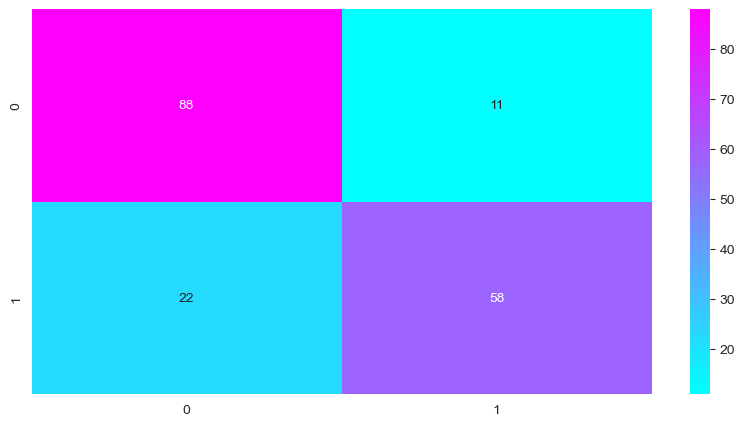

In [70]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='cool')
plt.show()

Accuracy : It is correctly predicted outcome to total outcomes.

Accuracy = (TP+TN)/(TP+FP+FN+TN)

Precision : It tells us if we have predicted a positive outcome, how much we are sure it will be true positive. In mathematicaly we can say, it is the proportion of true positive on all positives predictions.

Precision = TP/(TP+FP)

Recall : It is the proportion of true positives on all actual positive elements. Recall is also known as true positive rate.

Recall = TP/(TP+FN)

In [71]:
print('Accuracy of Logistic Regression model is  : ', (metrics.accuracy_score(y_test, y_pred)))
print('Recall of Logistic Regression model is    : ', (metrics.recall_score(y_test, y_pred)))
print('Precision of Logistic Regression model is : ', (metrics.precision_score(y_test, y_pred)))

Accuracy of Logistic Regression model is  :  0.8156424581005587
Recall of Logistic Regression model is    :  0.725
Precision of Logistic Regression model is :  0.8405797101449275


Accuracy and Precision are indeed good. But only 68.33% of total positive cases, this classifier could predict correctly.

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.84      0.72      0.78        80

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.81       179



Precision about who survived and not survived is good. Recall and F1 score is good for who didnot survive, but is okay for those who survived.

# Feature Scaling

Here we are having different dataset for training and test. So thre is no need to split the dataset. We can directly apply feature scaling.

In [73]:
X1_Train = df_train.drop(['Survived'],axis = 1)
y1_Train = df_train['Survived']

X1_Train.shape ,y1_Train.shape, y_test.shape , X_test.shape

((891, 10), (891,), (179,), (179, 10))

In [74]:
cols = df_test.columns

scal = RobustScaler()

X1_Train = scal.fit_transform(X1_Train)
df_test = scal.transform(df_test)

In [75]:
X1_Train = pd.DataFrame(X1_Train,columns=cols)
df_test = pd.DataFrame(df_test,columns=cols)

In [76]:
X1_Train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,-0.592240,1.0,0.0,-0.312011,0.0,0.0,0.0,0.0,0.0
1,-2.0,0.638529,1.0,0.0,2.461242,1.0,-1.0,1.0,0.0,-1.0
2,0.0,-0.284548,0.0,0.0,-0.282777,1.0,-1.0,0.0,0.0,0.0
3,-2.0,0.407760,1.0,0.0,1.673732,1.0,-1.0,0.0,0.0,0.0
4,0.0,0.407760,0.0,0.0,-0.277363,0.0,0.0,0.0,0.0,0.0


In [77]:
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.369299,0.0,0.0,-0.286926,0.0,0.0,0.0,1.0,-1.0
1,0.0,1.330837,1.0,0.0,-0.322838,1.0,-1.0,0.0,0.0,0.0
2,-1.0,2.484683,0.0,0.0,-0.206444,0.0,0.0,0.0,1.0,-1.0
3,0.0,-0.207624,0.0,0.0,-0.250836,0.0,0.0,0.0,0.0,0.0
4,0.0,-0.592240,1.0,1.0,-0.093839,1.0,-1.0,0.0,0.0,0.0


Building Logistic Regression

In [78]:
LogisticRegression_model.fit(X1_Train,y1_Train)

LogisticRegression(max_iter=4000)

In [79]:
y_pred_2 = LogisticRegression_model.predict(df_test)
y_pred_2

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [80]:
y_pred_2.shape

(418,)

Conclusion

Survival is highly dependent on Pclass. This indicates the majority of people who could afford enough money to get in Pclass 1, were most likely to survive.
62.96% of PClass 1 could survive
47.28% of Pclass2 could survive
24.24% of PClass3 could survive
Majority of the passenger who could survive are females.

Out of total females traveled 74.2% of them could survive.
Majority of the male passengers could not survive.

18.9% of total male traveled could only survive
Port from which the passengers have boarded also has a significant impact on the survival rate.

55.36% of Embarked C could survive
38.96% of Embarked Q could survive
33.7% of Embarked s could survive

In [81]:
submission = pd.DataFrame({'PassengerId': test_pass, 'predicted_Survived': y_pred_2})
submission

,PassengerId,predicted_Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [82]:
import pickle

In [83]:
with open("LogisticRegression_model.pkl" ,'wb') as f:
          pickle.dump(LogisticRegression_model,f)

In [84]:
with open("LogisticRegression_model.pkl", 'rb') as f:
    loaded_model = pickle.load(f)

In [100]:
input_data = pd.DataFrame([[1,38,1,0,71,1.0,0.0,1.0,0.0,0.0]], 
                           columns=['Pclass', 'Age', 'SibSp', 'Parch', 
                                    'Fare', 'Sex_female', 'Sex_male', 
                                    'Embarked_C', 'Embarked_Q', 'Embarked_S'])

In [101]:
loaded_model.predict(input_data)


array([0], dtype=int64)

In [89]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [90]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,38.000000,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,26.000000,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,35.000000,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3,35.000000,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0.0,1.0,0.0,0.0,1.0
887,1,19.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0
888,3,29.699118,1,2,23.4500,1.0,0.0,0.0,0.0,1.0
889,1,26.000000,0,0,30.0000,0.0,1.0,1.0,0.0,0.0


In [ ]:
# remove scsling and watch yt videos 3 of them which are liked